In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Series


In [3]:
label = ['a', 'b', 'c']
my_data = [10, 20, 30]
dt = pd.Series(data=my_data, index=label, dtype=np.int32)
print(dt)
# Print the data as a table
dt.to_frame()


a    10
b    20
c    30
dtype: int32


,0
a,10
b,20
c,30


## DataFrame


In [4]:
row = ['John', 'Bob', 'Alice', 'Mary', 'Mike']
col = ['age', 'state', 'score', 'grade']
data = [[23, 'CA', 90, 'A'], [20, 'NY', 80, 'B'], [
    25, 'TX', 70, 'C'], [27, 'FL', 60, 'D'], [30, 'WA', 50, 'F']]
df = pd.DataFrame(data=data, index=row, columns=col)
print(df, '\n')
df['gender'] = ['M', 'M', 'F', 'F', 'M']
print(df.loc[['John']], '\n')
print(df.info(), '\n')
print(df.describe())


       age state  score grade
John    23    CA     90     A
Bob     20    NY     80     B
Alice   25    TX     70     C
Mary    27    FL     60     D
Mike    30    WA     50     F 

      age state  score grade gender
John   23    CA     90     A      M 

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, John to Mike
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     5 non-null      int64 
 1   state   5 non-null      object
 2   score   5 non-null      int64 
 3   grade   5 non-null      object
 4   gender  5 non-null      object
dtypes: int64(2), object(3)
memory usage: 412.0+ bytes
None 

             age      score
count   5.000000   5.000000
mean   25.000000  70.000000
std     3.807887  15.811388
min    20.000000  50.000000
25%    23.000000  60.000000
50%    25.000000  70.000000
75%    27.000000  80.000000
max    30.000000  90.000000


# Handling Missing Data


In [5]:
# Mock dataframe for Nan value
df2 = pd.DataFrame({'A': [1, 2, np.nan], 'B': [5, np.nan, np.nan],
                    'C': [1, 2, 3]})
print(df2, '\n')

# Drop the row with Nan value
print(df2.dropna(axis=1, thresh=2), '\n')

# Fill the Nan value with 0
print(df2.fillna(value=0), '\n')


     A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  3 

     A  C
0  1.0  1
1  2.0  2
2  NaN  3 

     A    B  C
0  1.0  5.0  1
1  2.0  0.0  2
2  0.0  0.0  3 



# Merging data


In [6]:
# Vietnam have many famous food,such as Pho, Bun Cha, Banh Mi, Banh Xeo, etc.
# Create a dataframe to store the information of these food, cost, and the place where you can find them.
df_food = pd.DataFrame({'Food': ['Pho', 'Bun Cha', 'Banh Mi', 'Banh Xeo'],
                        'Cost': [2, 3, 1, 2],
                        'Place': ['Ha Noi', 'Ha Noi', 'Ho Chi Minh', 'Da Nang']})
# make a unit for cost
df_food['Cost'] = df_food['Cost'].apply(lambda x: str(x))
# Food is the index
# df_food.set_index('Food', inplace=True)
print(df_food, '\n')

# Create another dataframe about place and its scenic spots, one place can have many scenic spots.
df_place = pd.DataFrame({'Place': ['Ha Noi', 'Ho Chi Minh', 'Da Nang'],
                         'Scenic Spots': ['West Lake',
                                          'Ben Thanh Market',
                                          'My Khe Beach']})

# df_place.set_index('Place', inplace=True)
print(df_place, '\n')

# Merge two dataframe
df_merge = pd.merge(df_food, df_place, on='Place')

print(df_merge, '\n')

# df_merge.groupby(['Place','Food']).count().loc["Ha Noi"].loc["Bun Cha"]

# Convert column type from object to string
df_merge['Cost'] = df_merge['Cost'].astype(float)
print(df_merge.info(), '\n')


       Food Cost        Place
0       Pho    2       Ha Noi
1   Bun Cha    3       Ha Noi
2   Banh Mi    1  Ho Chi Minh
3  Banh Xeo    2      Da Nang 

         Place      Scenic Spots
0       Ha Noi         West Lake
1  Ho Chi Minh  Ben Thanh Market
2      Da Nang      My Khe Beach 

       Food Cost        Place      Scenic Spots
0       Pho    2       Ha Noi         West Lake
1   Bun Cha    3       Ha Noi         West Lake
2   Banh Mi    1  Ho Chi Minh  Ben Thanh Market
3  Banh Xeo    2      Da Nang      My Khe Beach 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Food          4 non-null      object 
 1   Cost          4 non-null      float64
 2   Place         4 non-null      object 
 3   Scenic Spots  4 non-null      object 
dtypes: float64(1), object(3)
memory usage: 256.0+ bytes
None 



# Pivot Table


In [7]:
data = {'Company': ['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
        'Person': ['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
        'Sales': [200, 120, 340, 124, 243, 350]}
df = pd.DataFrame(data)
print(df, '\n')
# Pivot table
print(df.pivot_table(values='Sales', index=['Company', 'Person']), '\n')

# More complex pivot table
df = pd.DataFrame({'A': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
                   'B': ['one', 'one', 'two', 'two', 'one', 'one'],
                   'C': ['x', 'y', 'x', 'y', 'x', 'y'],
                   'D': [1, 3, 2, 5, 4, 1]})
print(df, '\n')
print(df.pivot_table(values='D', index=['A', 'B'], columns=['C']), '\n')


  Company   Person  Sales
0    GOOG      Sam    200
1    GOOG  Charlie    120
2    MSFT      Amy    340
3    MSFT  Vanessa    124
4      FB     Carl    243
5      FB    Sarah    350 

                 Sales
Company Person        
FB      Carl       243
        Sarah      350
GOOG    Charlie    120
        Sam        200
MSFT    Amy        340
        Vanessa    124 

     A    B  C  D
0  foo  one  x  1
1  foo  one  y  3
2  foo  two  x  2
3  bar  two  y  5
4  bar  one  x  4
5  bar  one  y  1 

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN 



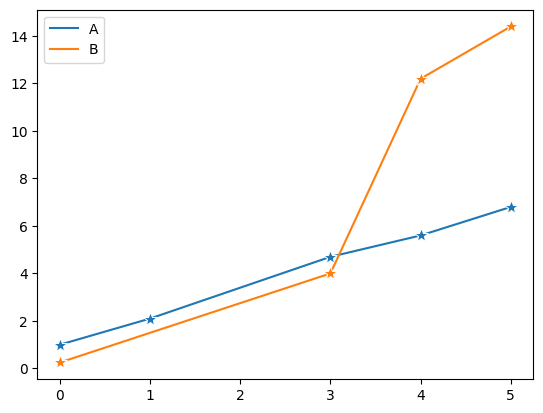

     A      B
0  1.0   0.25
1  2.1    NaN
2  NaN    NaN
3  4.7   4.00
4  5.6  12.20
5  6.8  14.40


<Axes: >

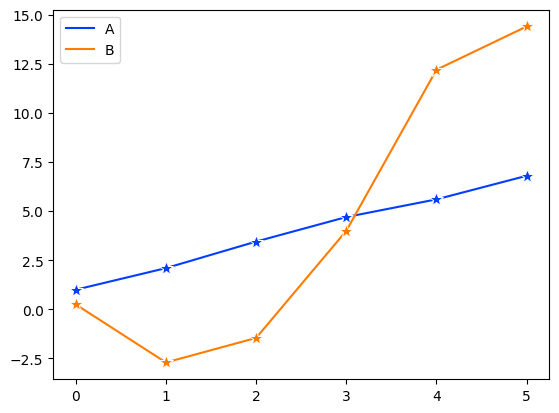

In [8]:
# interpolate
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                     'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
sns.lineplot(data=df, dashes=False,marker='*',markersize=10)
plt.show()
print(df)
df.interpolate(method='polynomial', order=2, limit_direction='forward', axis=0, inplace=True)

sns.lineplot(data=df, dashes=False,marker='*',markersize=10,palette='bright')

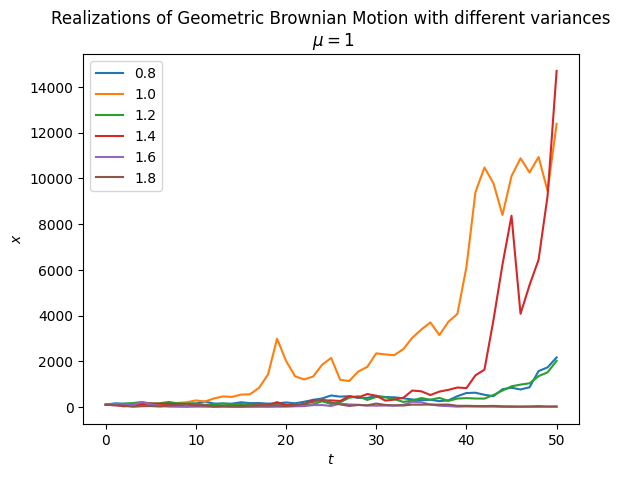

In [9]:
mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()


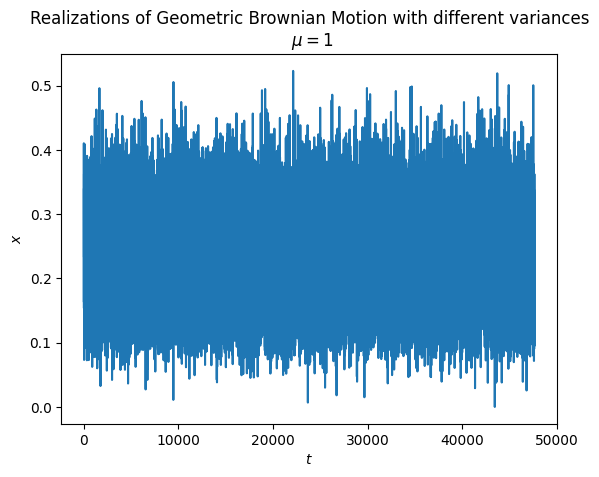

In [33]:
mu = 0.1 
sigma = 0.2
n = 47662
dt = 0.1
x0 = 100
x = np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size=(1, n)).T)
x = x- x.min()
# x = np.vstack([np.ones(1), x])
# x = x.cumprod(axis=0)
plt.plot(x)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title("Realizations of Geometric Brownian Motion with different variances\n $\mu=1$")
plt.show()